In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import metric, motif
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [2]:
# Parameters for synthesized time series
quarter_size = 8
pattern_size = quarter_size * 4
num_samples = 100
std0 = 1
std1 = 0.05
std2 = 2 * std1

# Parameters for motif enumeration methods
window_size = pattern_size
radiuses = np.linspace(0.01, 2.0, 200)

In [3]:
# Define motif-1 (triangular wave)
pattern1 = np.concatenate([
    np.arange(0, quarter_size),
    np.arange(quarter_size, -quarter_size, -1),
    np.arange(-quarter_size, 0)
]).astype('float')

# Define motif-2 (sine wave)
pattern2 = np.sin(np.linspace(0, 2 * np.pi, pattern_size))

# Standardize motifs
pattern1 = metric.standardize(pattern1, axis=0)
pattern2 = metric.standardize(pattern2, axis=0)

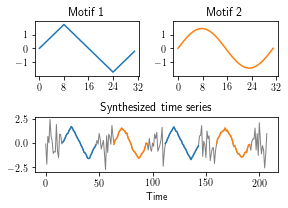

In [4]:
# Initialize random seed
np.random.seed(0)

# Generate patterns
X1 = np.random.normal(0, std1, [num_samples, pattern_size])
X1 += pattern1
X2 = np.random.normal(0, std2, [num_samples, pattern_size])
X2 += pattern2

# Standardize patterns
X1std = metric.standardize(X1.copy().T, axis=0).T
X2std = metric.standardize(X2.copy().T, axis=0).T

# Synthesize time seirs
period = 3 * pattern_size
X = np.random.normal(0, std0, [num_samples, period])
begin1 = 2 * quarter_size
end1 = 6 * quarter_size
begin2 = 8 * quarter_size
end2 = 12 * quarter_size
X[:, begin1:end1] = X1
X[:, begin2:end2] = X2
X = X.reshape([-1, 1])
Xtail = np.random.normal(0, std0, [2 * quarter_size, 1])
X = np.concatenate([X, Xtail])
length = len(X)

# Visualize motifs and synthesized time series
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(2, 2, 1)
ax.plot(pattern1, c='tab:blue')
ax.set_xticks(np.arange(0, pattern_size + 1, quarter_size))
ax.set_ylim(-2, 2)
ax.set_yticks([-1, 0, 1])
ax.set_title('Motif 1')
ax = fig.add_subplot(2, 2, 2)
ax.plot(pattern2, c='tab:orange')
ax.set_xticks(np.arange(0, pattern_size + 1, quarter_size))
ax.set_ylim(-2, 2)
ax.set_yticks([-1, 0, 1])
ax.set_title('Motif 2')
ax = fig.add_subplot(2, 1, 2)
ax.plot(X[:26 * quarter_size], c='0.5', lw=1)
ax.plot(np.arange(2 * quarter_size, 6 * quarter_size), X[2 * quarter_size:6 * quarter_size], c='tab:blue')
ax.plot(np.arange(8 * quarter_size, 12 * quarter_size), X[8 * quarter_size:12 * quarter_size], c='tab:orange')
ax.plot(np.arange(14 * quarter_size, 18 * quarter_size), X[14 * quarter_size:18 * quarter_size], c='tab:blue')
ax.plot(np.arange(20 * quarter_size, 24 * quarter_size), X[20 * quarter_size:24 * quarter_size], c='tab:orange')
ax.set_xlabel('Time')
ax.set_title('Synthesized time series')
plt.tight_layout()
plt.savefig('../figures/synthetic_ts.pdf', bbox_inches='tight', pad_inches=0)

In [5]:
# Get ground truth labels
actuals1 = np.full(num_samples, 0)
actuals2 = np.full(num_samples, 1)
actuals = np.concatenate([actuals1, actuals2])

# Get ground truth indices
indices1 = np.arange(2 * quarter_size, length, period)
indices2 = np.arange(8 * quarter_size, length, period)
indices = np.concatenate([indices1, indices2])

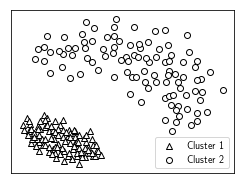

In [6]:
# Visualize MDS
mds = motif.MultiDimensionalScaling(markers=['^', 'o'])
mds.fit(np.concatenate([X1std, X2std], axis=0), actuals)
mds.plot(width=4, height=3, filename='../figures/synthetic_mds.pdf')

In [7]:
# ScanMK
mk = motif.ScanMK()
mk.prepare([X], window_size)
mk.scan()

# Enumerate motifs for each radius
mk_purities = {}
for radius in radiuses:
    print('\nradius =', radius)
    mk.find(radius)
    print(mk.motifs)
    if len(mk.motifs) > 0:
        # Visualize MDS
#         predictions = mk.get_nearest_labels(indices)
#         mds.plot(predictions, width=4, height=3,
#                  title='ScanMK (radius = {:g})'.format(radius),
#                  filename='../figures/synthetic_mds_mk_{:.2f}.pdf'.format(radius))
        # Compute purities
        purities = [np.nan]
        for num_motifs in range(1, len(mk.motifs) + 1):
            predictions = mk.get_nearest_labels(indices, num_motifs)
            purity = motif.get_purity(actuals, predictions)
            purities.append(purity)
        mk_purities[radius] = purities
        print(purities)

ScanMK: 100%|██████████████████████████████████████████████████████████████████████| 9585/9585 [01:46<00:00, 90.14it/s]



radius = 0.01
[]

radius = 0.02
[]

radius = 0.03
[]

radius = 0.04
[]

radius = 0.05
[]

radius = 0.06
[]

radius = 0.07
[]

radius = 0.08
[]

radius = 0.09
[]

radius = 0.1
[]

radius = 0.11
[]

radius = 0.12
[]

radius = 0.13
[]

radius = 0.14
[]

radius = 0.15
[]

radius = 0.16
[]

radius = 0.17
[]

radius = 0.18
[]

radius = 0.19
[]

radius = 0.2
[]

radius = 0.21
[1072]
[nan, 0.01]

radius = 0.22
[1072]
[nan, 0.01]

radius = 0.23
[1072]
[nan, 0.01]

radius = 0.24
[1072, 8463]
[nan, 0.01, 0.02]

radius = 0.25
[1072, 8463]
[nan, 0.01, 0.02]

radius = 0.26
[1072, 8463, 3953]
[nan, 0.01, 0.02, 0.03]

radius = 0.27
[1072, 8463, 3953, 6833, 8271]
[nan, 0.01, 0.02, 0.03, 0.04, 0.05]

radius = 0.28
[1072, 8463, 3953, 6833, 8271, 8945]
[nan, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

radius = 0.29
[1072, 8463, 3953, 6833, 8271, 8945, 207, 8082, 3470, 6735]
[nan, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.08, 0.09, 0.1]

radius = 0.3
[1072, 8463, 3953, 6833, 8271, 207, 5394, 3470, 6735,

[nan, 0.5, 0.52, 0.575, 0.6, 0.605, 0.615, 0.63, 0.645, 0.655, 0.66, 0.68, 0.685, 0.69, 0.695, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735]

radius = 0.75
[1072, 8609, 6689, 2367, 2078, 6978, 7167, 8510, 6594, 1315, 3041, 3325, 5059, 2564, 2179, 1981, 158, 1693, 7837, 9180]
[nan, 0.5, 0.52, 0.595, 0.615, 0.625, 0.64, 0.66, 0.665, 0.685, 0.69, 0.7, 0.705, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.75, 0.755]

radius = 0.76
[1072, 8609, 6689, 2367, 2078, 6978, 7167, 8510, 1315, 3041, 3325, 5059, 2564, 6882, 2179, 1981, 158, 1693, 7837, 4868, 9180]
[nan, 0.5, 0.525, 0.6, 0.62, 0.63, 0.645, 0.665, 0.67, 0.675, 0.685, 0.69, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.74, 0.745, 0.75]

radius = 0.77
[1072, 8609, 6689, 2367, 2078, 6978, 7167, 8510, 1315, 258, 5059, 2564, 5821, 6882, 2179, 158, 1693, 7837, 4868, 9180, 8797, 6212]
[nan, 0.5, 0.525, 0.6, 0.62, 0.63, 0.645, 0.67, 0.68, 0.685, 0.69, 0.7, 0.705, 0.715, 0.72, 0.725, 0.73, 0.735, 0.745, 0.75, 0.755, 0.765, 0.77]

radius = 0.78
[1072

[nan, 0.5, 0.585, 0.64, 0.69, 0.745, 0.76, 0.775, 0.78, 0.785, 0.79, 0.795, 0.805, 0.815, 0.82, 0.825]

radius = 1.05
[1072, 5730, 7842, 2366, 6014, 1316, 2564, 8124, 62, 7164, 2756, 3803, 4668, 1986, 4198, 3236]
[nan, 0.5, 0.545, 0.59, 0.62, 0.685, 0.7, 0.71, 0.715, 0.72, 0.725, 0.73, 0.74, 0.745, 0.75, 0.76, 0.765]

radius = 1.06
[1072, 5730, 7842, 2366, 6014, 1316, 2564, 8124, 62, 7164, 2756, 3803, 4668, 1986, 4198, 3236]
[nan, 0.5, 0.54, 0.585, 0.615, 0.68, 0.695, 0.705, 0.71, 0.715, 0.72, 0.725, 0.735, 0.74, 0.745, 0.75, 0.755]

radius = 1.07
[1072, 5730, 7842, 2366, 6014, 2564, 8124, 644, 62, 2756, 4668, 356, 4197, 1986, 6588, 6300]
[nan, 0.5, 0.54, 0.585, 0.61, 0.67, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73]

radius = 1.08
[1072, 5730, 7842, 2366, 6014, 8124, 644, 62, 2756, 740, 4668, 356, 6588, 6309]
[nan, 0.5, 0.545, 0.585, 0.605, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71]

radius = 1.09
[1072, 5730, 7842, 6014, 6301, 8125, 644,

In [8]:
# SetFinder
sf = motif.SetFinder()
sf.prepare([X], window_size)
sf.count(radiuses)

# Enumerate motifs for each radius
sf_purities = {}
for radius in radiuses:
    print('\nradius =', radius)
    sf.find(radius)
    print(sf.motifs)
    if len(sf.motifs) > 0:
        # Visualize MDS
#         predictions = sf.get_nearest_labels(indices)
#         mds.plot(predictions, width=4, height=3,
#                  title='SetFinder (radius = {:g})'.format(radius),
#                  filename='../figures/synthetic_mds_sf_{:.2f}.pdf'.format(radius))
        # Compute purities
        purities = [np.nan]
        for num_motifs in range(1, len(sf.motifs) + 1):
            predictions = sf.get_nearest_labels(indices, num_motifs)
            purity = motif.get_purity(actuals, predictions)
            purities.append(purity)
        sf_purities[radius] = purities
        print(purities)

SetFinder: 100%|███████████████████████████████████████████████████████████████████| 9585/9585 [02:08<00:00, 74.44it/s]



radius = 0.01
[]

radius = 0.02
[]

radius = 0.03
[]

radius = 0.04
[]

radius = 0.05
[]

radius = 0.06
[]

radius = 0.07
[]

radius = 0.08
[]

radius = 0.09
[]

radius = 0.1
[]

radius = 0.11
[]

radius = 0.12
[]

radius = 0.13
[]

radius = 0.14
[]

radius = 0.15
[]

radius = 0.16
[]

radius = 0.17
[]

radius = 0.18
[]

radius = 0.19
[]

radius = 0.2
[]

radius = 0.21
[1072]
[nan, 0.01]

radius = 0.22
[1072]
[nan, 0.01]

radius = 0.23
[1072]
[nan, 0.01]

radius = 0.24
[3856, 7983]
[nan, 0.015, 0.025]

radius = 0.25
[1072, 7983]
[nan, 0.015, 0.025]

radius = 0.26
[3952, 3857, 7983]
[nan, 0.03, 0.045, 0.055]

radius = 0.27
[3952, 497, 591, 2991, 6833]
[nan, 0.055, 0.07, 0.08, 0.09, 0.095]

radius = 0.28
[3952, 497, 8463, 591, 3185, 8945]
[nan, 0.065, 0.08, 0.095, 0.105, 0.115, 0.12]

radius = 0.29
[2896, 497, 2321, 7215, 207, 5394, 6735, 7311]
[nan, 0.08, 0.095, 0.105, 0.11, 0.12, 0.13, 0.135, 0.14]

radius = 0.3
[2896, 497, 591, 2607, 5393, 5871, 7313, 207, 3662, 5970, 7410, 8174, 865

[nan, 0.5, 0.665, 0.705, 0.745, 0.77, 0.795, 0.815, 0.83, 0.845, 0.86, 0.87, 0.88, 0.885, 0.89, 0.9, 0.905, 0.91, 0.915]

radius = 0.81
[1360, 6497, 543, 4095, 4862, 4289, 7746, 1218, 1985, 4482, 6595, 734, 7261, 1602, 1884, 5155]
[nan, 0.5, 0.67, 0.715, 0.75, 0.775, 0.8, 0.82, 0.835, 0.855, 0.87, 0.88, 0.885, 0.89, 0.9, 0.905, 0.91]

radius = 0.82
[16, 8129, 543, 4095, 1214, 3041, 8898, 354, 1985, 2754, 6595, 1790, 7261, 1884, 3325, 8803]
[nan, 0.5, 0.68, 0.725, 0.76, 0.78, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.865, 0.87, 0.88, 0.885]

radius = 0.83
[16, 6497, 543, 4095, 1214, 3041, 8898, 354, 1985, 2754, 6595, 3325, 5917, 1596, 1884, 7939]
[nan, 0.5, 0.69, 0.735, 0.765, 0.785, 0.805, 0.82, 0.83, 0.84, 0.85, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885]

radius = 0.84
[16, 6497, 4383, 4095, 4289, 4478, 8898, 354, 4670, 1985, 6595, 2654, 5917, 6211, 1596, 1884]
[nan, 0.5, 0.69, 0.72, 0.75, 0.775, 0.78, 0.795, 0.815, 0.825, 0.84, 0.85, 0.86, 0.865, 0.87, 0.875, 0.88]

radius = 0.85
[4768,

In [9]:
# HubFinder
hf = motif.HubFinder()
hf.compute([X], window_size)
print(hf.motifs)

# Compute purities
hf_purities = [np.nan]
for num_motifs in range(1, len(hf.motifs) + 1):
    predictions = hf.get_nearest_labels(indices, num_motifs)
    # Visualize MDS
#     mds.plot(predictions, width=4, height=3,
#              title='HubFinder (number of motifs = {:g})'.format(num_motifs),
#              filename='../figures/synthetic_mds_hf_{:g}.pdf'.format(num_motifs))
    # Compute purities
    purity = motif.get_purity(actuals, predictions)
    hf_purities.append(purity)
print(hf_purities)

HubFinder: 100%|██████████████████████████████████████████████████████████████████| 9585/9585 [00:14<00:00, 641.33it/s]


[3184, 4864, 2272, 3952, 3328, 7168, 9424, 6304, 4287, 5728, 6495, 1840, 2512, 5056, 6688, 1120, 3856, 5248, 5584, 8992, 4384, 8895, 3040, 880, 8848, 160, 1504, 8463, 8609, 9472, 2464, 9279]
[nan, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
# Get radius vs purity for #motifs=2
result_mk_radiuses = []
result_mk_purities = []
for radius in radiuses:
    try:
        result_mk_purities.append(mk_purities[radius][2])
        result_mk_radiuses.append(radius)
    except KeyError:
        continue
    except IndexError:
        result_mk_purities.append(mk_purities[radius][-1])
        result_mk_radiuses.append(radius)
result_sf_radiuses = []
result_sf_purities = []
for radius in radiuses:
    try:
        result_sf_purities.append(sf_purities[radius][2])
        result_sf_radiuses.append(radius)
    except KeyError:
        continue
    except IndexError:
        result_sf_purities.append(sf_purities[radius][-1])
        result_sf_radiuses.append(radius)

# Get the best radius and purity
mk_argmax = np.array(result_mk_purities).argmax()
mk_best_radius = result_mk_radiuses[mk_argmax]
mk_best_purity = result_mk_purities[mk_argmax]
sf_argmax = np.array(result_sf_purities).argmax()
sf_best_radius = result_sf_radiuses[sf_argmax]
sf_best_purity = result_sf_purities[sf_argmax]
hf_purity = hf_purities[2]
print('purity (num_motifs = 2)')
print('ScanMK: {:g} (@ radius = {:g})'.format(mk_best_purity, mk_best_radius))
print('SetFinder: {:g} (@ radius = {:g})'.format(sf_best_purity, sf_best_radius))
print('HubFinder: {:g}'.format(hf_purity))
mk.find(mk_best_radius)
sf.find(sf_best_radius)

purity (num_motifs = 2)
ScanMK: 0.585 (@ radius = 0.96)
SetFinder: 0.69 (@ radius = 0.83)
HubFinder: 1


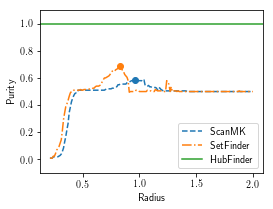

In [11]:
# Visualize radius vs purity
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(result_mk_radiuses, result_mk_purities, '--', c='tab:blue', label='ScanMK')
ax.plot(result_sf_radiuses, result_sf_purities, '-.', c='tab:orange', label='SetFinder')
ax.plot(mk_best_radius, mk_best_purity, 'o', c='tab:blue')
ax.plot(sf_best_radius, sf_best_purity, 'o', c='tab:orange')
ax.axhline(hf_purity, ls='-', c='tab:green', label='HubFinder')
ax.set_xlabel('Radius')
ax.set_ylabel('Purity')
ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.savefig('../figures/synthetic_radius_vs_purity.pdf', bbox_inches='tight', pad_inches=0)

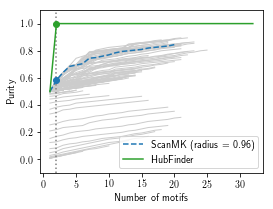

In [12]:
# Visualize #motifs vs purity (ScanMK)
fig, ax = plt.subplots(figsize=(4, 3))
for radius in radiuses:
    try:
        ax.plot(mk_purities[radius], lw=1, c='0.8')
    except KeyError:
        pass
ax.axvline(2, ls=':', c='0.5')
ax.plot(mk_purities[mk_best_radius], '--', c='tab:blue',
        label='ScanMK (radius = {:g})'.format(mk_best_radius))
ax.plot(hf_purities, '-', c='tab:green', label='HubFinder')
ax.plot(2, mk_purities[mk_best_radius][2], 'o', c='tab:blue')
ax.plot(2, hf_purities[2], 'o', c='tab:green')
ax.set_xlabel('Number of motifs')
ax.set_ylabel('Purity')
ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.savefig('../figures/synthetic_motif_vs_purity_mk.pdf', bbox_inches='tight', pad_inches=0)

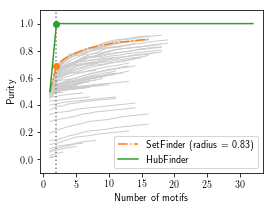

In [13]:
# Visualize #motifs vs purity (SetFinder)
fig, ax = plt.subplots(figsize=(4, 3))
for radius in radiuses:
    try:
        ax.plot(sf_purities[radius], lw=1, c='0.8')
    except KeyError:
        pass
ax.axvline(2, ls=':', c='0.5')
ax.plot(sf_purities[sf_best_radius], '-.', c='tab:orange',
        label='SetFinder (radius = {:g})'.format(sf_best_radius))
ax.plot(hf_purities, '-', c='tab:green', label='HubFinder')
ax.plot(2, sf_purities[sf_best_radius][2], 'o', c='tab:orange')
ax.plot(2, hf_purities[2], 'o', c='tab:green')
ax.set_xlabel('Number of motifs')
ax.set_ylabel('Purity')
ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.savefig('../figures/synthetic_motif_vs_purity_sf.pdf', bbox_inches='tight', pad_inches=0)

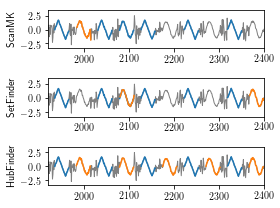

In [14]:
# Visualize motifs
fig = plt.figure(figsize=(4, 3))

# ScanMK
ax = fig.add_subplot(3, 1, 1)
ax.plot(X, c='0.5', lw=1)
for i in np.where(mk.labels[1] == 0)[0]:
    ax.plot(range(i, i + window_size), X[i:i + window_size], c='tab:blue')
for i in np.where(mk.labels[1] == 1)[0]:
    ax.plot(range(i, i + window_size), X[i:i + window_size], c='tab:orange')
ax.set_xlim(20*period, 25*period)
ax.set_ylabel('ScanMK')

# SetFinder
ax = fig.add_subplot(3, 1, 2)
ax.plot(X, c='0.5', lw=1)
for i in np.where(sf.labels[1] == 0)[0]:
    ax.plot(range(i, i + window_size), X[i:i + window_size], c='tab:blue')
for i in np.where(sf.labels[1] == 1)[0]:
    ax.plot(range(i, i + window_size), X[i:i + window_size], c='tab:orange')
ax.set_xlim(20*period, 25*period)
ax.set_ylabel('SetFinder')

# HubFinder
ax = fig.add_subplot(3, 1, 3)
ax.plot(X, c='0.5', lw=1)
for i in np.where(hf.labels[1] == 0)[0]:
    ax.plot(range(i, i + window_size), X[i:i + window_size], c='tab:blue')
for i in np.where(hf.labels[1] == 1)[0]:
    ax.plot(range(i, i + window_size), X[i:i + window_size], c='tab:orange')
ax.set_xlim(20*period, 25*period)
ax.set_ylabel('HubFinder')

# Save
plt.tight_layout()
plt.savefig('../figures/synthetic_motifs.pdf', bbox_inches='tight', pad_inches=0)

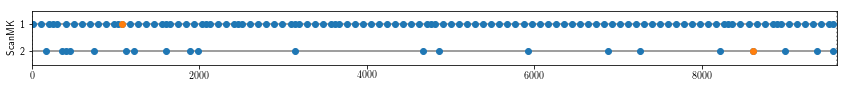

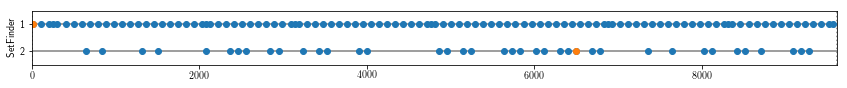

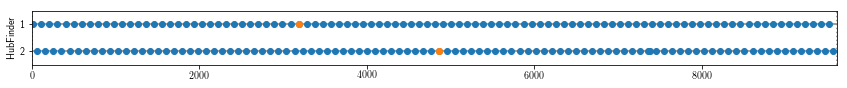

In [15]:
# Visualize motif labels
mk.plot_labels(2, xscale=0.0015, yscale=0.5, ylabel='ScanMK', filename='../figures/synthetic_mk_motifs.pdf')
sf.plot_labels(2, xscale=0.0015, yscale=0.5, ylabel='SetFinder', filename='../figures/synthetic_sf_motifs.pdf')
hf.plot_labels(2, xscale=0.0015, yscale=0.5, ylabel='HubFinder', filename='../figures/synthetic_hf_motifs.pdf')